# Single-cell GANs

Here we try to learn a distribution over single-cell microscopy images using generative adversarial networks. We use a deep-convolutional Wasserstein-GAN ([DCGAN](https://arxiv.org/abs/1511.06434]) and [Wasserstein GAN](https://arxiv.org/abs/1701.07875)) and a multivariate normal noise model.

The GAN's discriminator consists of

* four convolutional layers,
* leaky rectifier activation functions,
* a dropout of 25%,
* and batch normalization layers after each convolutional layer.

The GAN's generator uses

* a 100 dimensional (multivariate normal noise model) as input,
* three convolutional layers,
* rectifier activation functions,
* batch normalisation.

As in the original paper ([Wasserstein GAN](https://arxiv.org/abs/1701.07875)) we use `RMSprop` as optimizer.

We use roughly 10000 images of dimension $75 \times 100$ and three different color channels that look like this:

We load some libraries first.

In [1]:
import pandas
import numpy
import glob
import os
import imageio

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

We already preprocessed the data and saved them as a numpy array.

In [2]:
dat = "_data/images_small.npy"

In [3]:
X = numpy.load(dat)

In [4]:
X.shape

(9232, 75, 100, 3)

Let's have a look at an image and the respective channels

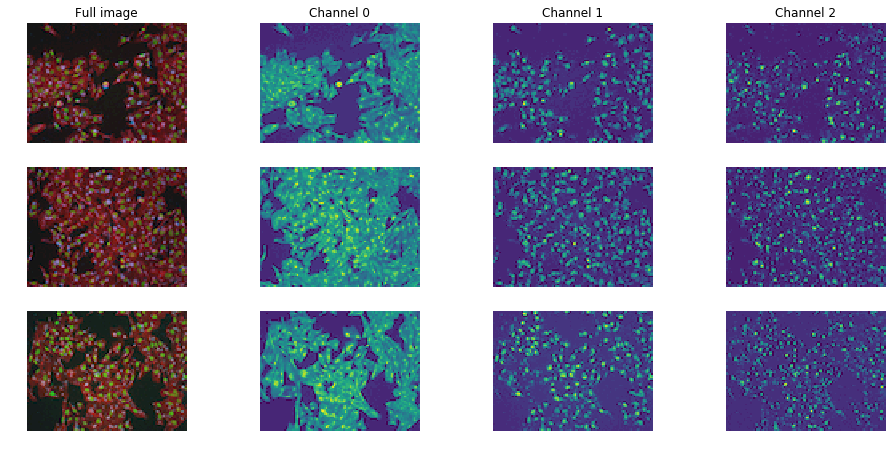

In [5]:
ncol, nrow = 4, 3
f,ax = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*2.5))
for j in range(nrow):
    for i in range(ncol):
        if i == 0:
            ax[j][i].imshow(X[j,:,:,:] / 255, cmap="magma")
        else:
            ax[j][i].imshow(X[j,:,:,i - 1] / 255)
        ax[j][i].axis('off')
for i, title in enumerate(["Full image", "Channel 0", "Channel 1", "Channel 2"]):
    ax[0][i].set_title(title)
plt.show()
plt.close()

The images have a small dimensionality that is why they are rather blurry.

Form here, we feed the images into the GAN using the accompanying `Python` script and generate some images after the network is trained. I saved some generated images in numpy objects. Let's have a look at some.

In [6]:
fls = glob.glob("_data/images/sc_all_channel-50*.npy")

In [7]:
import re
reg = re.compile(".*-(\d+).npy")
fls = sorted(fls, key=lambda x: int(reg.match(x).group(1)))

In [8]:
imgs = numpy.load(fls[-5])

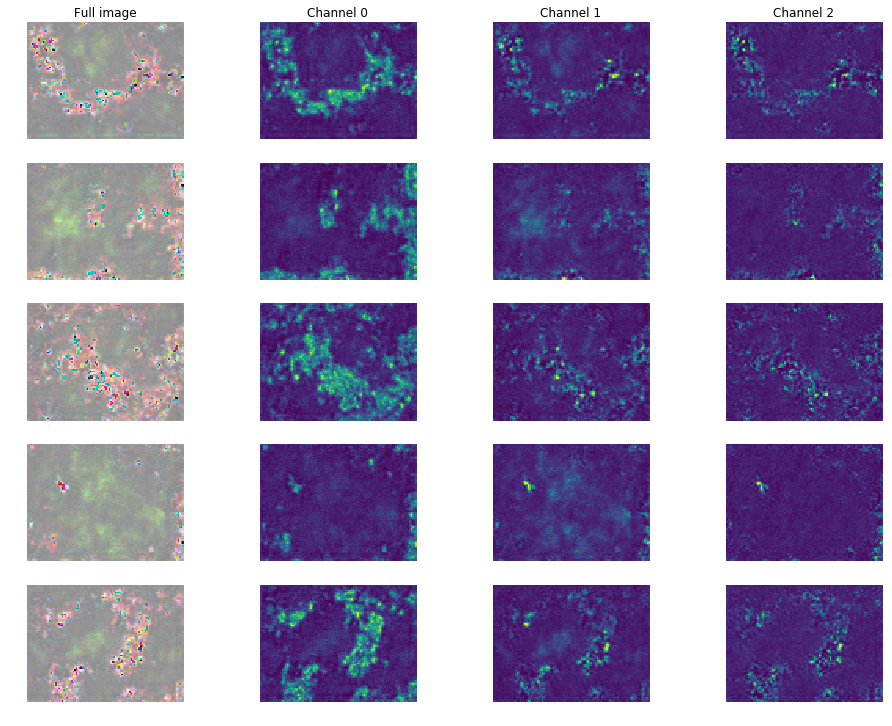

In [9]:
nrow, ncol= imgs.shape[0], imgs.shape[3] + 1
f,ax = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*2.5))
for j in range(nrow):
    for i in range(ncol):
        if i == 0:
            ax[j][i].imshow(imgs[j,:,:,:])
        else:
            ax[j][i].imshow(imgs[j,:,:,i - 1] / 255)
        ax[j][i].axis('off')
for i, title in enumerate(["Full image", "Channel 0", "Channel 1", "Channel 2"]):
    ax[0][i].set_title(title)
plt.show()
plt.close()

In [10]:
imgs = [numpy.load(x)  for x in fls]

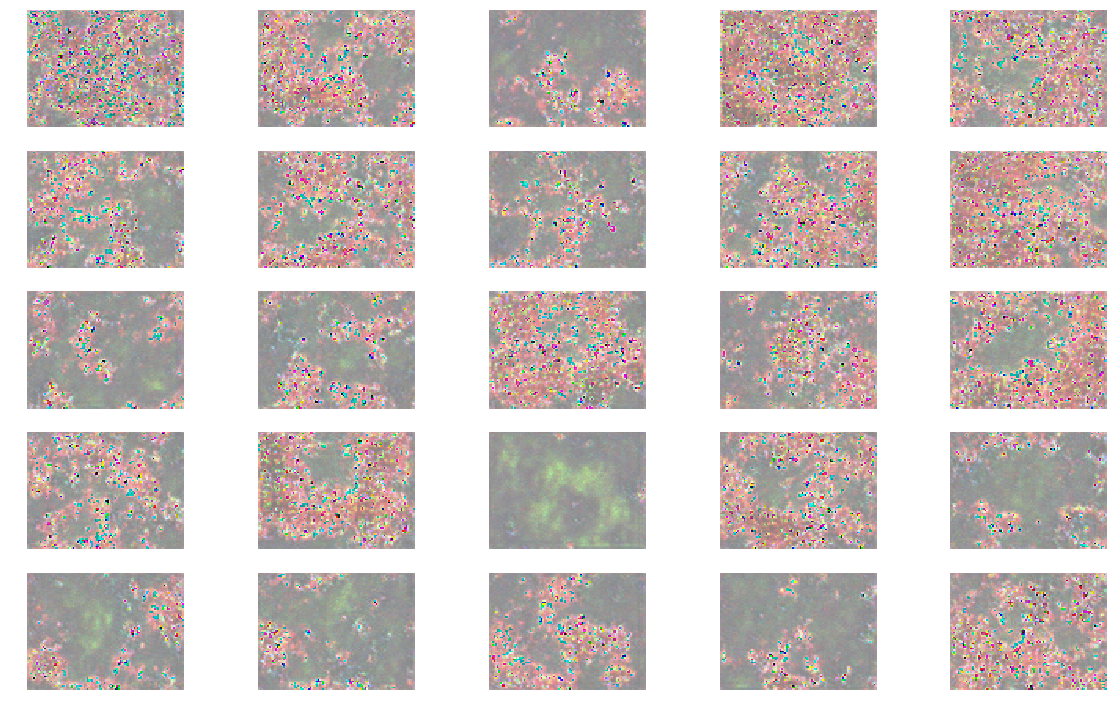

In [11]:
nrow, ncol = 5, 5
f,ax = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*2.5))
for j in range(nrow):
    for i in range(ncol):
        ax[j][i].imshow(imgs[j * nrow + i][0])
        ax[j][i].axis('off')
plt.show()
plt.close()